In [1048]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1049]:
dataframe_csv = pd.read_csv("produksi_minyak_mentah.csv")
file_json = json.load(open("kode_negara_lengkap.json"))
dataframe_json = pd.DataFrame.from_dict(file_json, orient='columns')

In [1050]:
list_kodekumpulannegara = []
for i in list(dataframe_csv['kode_negara']) :
    if i not in list(dataframe_json['alpha-3']) :
        list_kodekumpulannegara.append(i)
for i in list_kodekumpulannegara :
    dataframe_csv = dataframe_csv[dataframe_csv.kode_negara != i]

In [1051]:
dataframe_jsonsingkat = dataframe_json[['name', 'region', 'sub-region', 'alpha-3']]
dataframe_jsonbaru = dataframe_jsonsingkat.rename(columns = {'alpha-3':'kode_negara'})
dataframe_gabungan = pd.merge(dataframe_csv, dataframe_jsonbaru, on = 'kode_negara')
dataframe_gabungan = dataframe_gabungan.rename(columns = {'name':'nama_negara'})

In [1052]:
#nomor a
n = input("Nama Negara: ")
N = n.title()

In [1053]:
dataframe_jumlahproduksi = dataframe_gabungan.loc[dataframe_gabungan['nama_negara'] == N]
print(dataframe_jumlahproduksi)

     kode_negara  tahun   produksi nama_negara region          sub-region
2318         IDN   1971  44946.941   Indonesia   Asia  South-eastern Asia
2319         IDN   1972  54596.060   Indonesia   Asia  South-eastern Asia
2320         IDN   1973  67429.592   Indonesia   Asia  South-eastern Asia
2321         IDN   1974  69264.556   Indonesia   Asia  South-eastern Asia
2322         IDN   1975  65816.985   Indonesia   Asia  South-eastern Asia
2323         IDN   1976  75956.720   Indonesia   Asia  South-eastern Asia
2324         IDN   1977  84901.024   Indonesia   Asia  South-eastern Asia
2325         IDN   1978  80951.427   Indonesia   Asia  South-eastern Asia
2326         IDN   1979  78746.481   Indonesia   Asia  South-eastern Asia
2327         IDN   1980  79504.846   Indonesia   Asia  South-eastern Asia
2328         IDN   1981  80691.242   Indonesia   Asia  South-eastern Asia
2329         IDN   1982  66254.616   Indonesia   Asia  South-eastern Asia
2330         IDN   1983  66566.523   I

<AxesSubplot:title={'center':'Grafik Jumlah Produksi terhadap Tahun dari Suatu Negara'}, xlabel='tahun'>

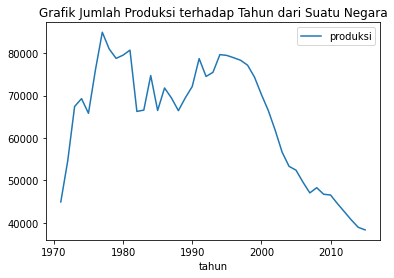

In [1054]:
dataframe_jumlahproduksi.plot(x='tahun', y='produksi', title='Grafik Jumlah Produksi terhadap Tahun dari Suatu Negara')

In [1055]:
#nomor b
B = input("Banyak Negara: ")
b = int(B)
T = input("Tahun: ")
t = int(T)

In [1056]:
dataframe_jumlahproduksiterbesar = dataframe_gabungan.loc[dataframe_gabungan['tahun'] == t]
dataframe_jumlahproduksiterbesar = dataframe_jumlahproduksiterbesar.sort_values(by='produksi', ascending=False)
dataframe_jumlahproduksibaru = dataframe_jumlahproduksiterbesar[:b]
print(dataframe_jumlahproduksibaru)

     kode_negara  tahun    produksi                         nama_negara  \
1305         USA   1971  482149.550            United States of America   
3014         SAU   1971  241141.895                        Saudi Arabia   
2363         IRN   1971  230174.161          Iran (Islamic Republic of)   
5498         VEN   1971  197992.167  Venezuela (Bolivarian Republic of)   
4602         KWT   1971  155964.539                              Kuwait   

        region                       sub-region  
1305  Americas                 Northern America  
3014      Asia                     Western Asia  
2363      Asia                    Southern Asia  
5498  Americas  Latin America and the Caribbean  
4602      Asia                     Western Asia  


<AxesSubplot:title={'center':'Grafik Beberapa Negara dengan Jumlah Produksi Terbesar pada Suatu Tahun'}, xlabel='nama_negara'>

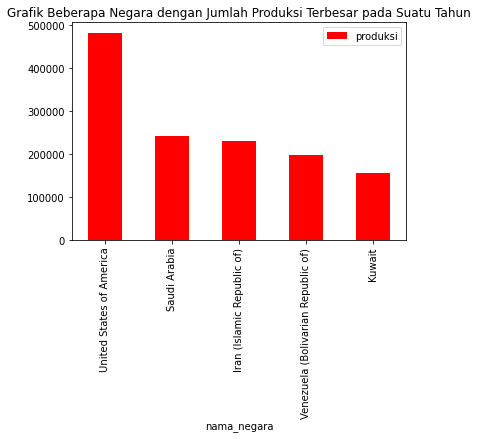

In [1057]:
dataframe_jumlahproduksibaru.plot.bar(x='nama_negara', y='produksi', color='red', title='Grafik Beberapa Negara dengan Jumlah Produksi Terbesar pada Suatu Tahun')

In [1058]:
#nomor c
list_namanegara = []
for i in list(dataframe_gabungan['nama_negara']) :
    if i not in list_namanegara :
        list_namanegara.append(i)

In [1059]:
list_jumlahkumulatif = []
for i in list_namanegara :
    jumlahproduksi_negara = dataframe_gabungan.loc[dataframe_gabungan['nama_negara'] == i, 'produksi'].sum()
    list_jumlahkumulatif.append(jumlahproduksi_negara)

In [1060]:
dataframe_kumulatifnegara = pd.DataFrame(list(zip(list_namanegara, list_jumlahkumulatif)), columns=['nama_negara', 'jumlah_kumulatif'])

In [1061]:
B2 = input("Banyak Negara: ")
b2 = int(B2)

In [1062]:
dataframe_jumlahkumulatifterbesar = dataframe_kumulatifnegara.sort_values(by='jumlah_kumulatif', ascending=False)
dataframe_jumlahkumulatifterbesarbaru = dataframe_jumlahkumulatifterbesar[:b2]
print(dataframe_jumlahkumulatifterbesarbaru)

                            nama_negara  jumlah_kumulatif
73                         Saudi Arabia      1.771177e+07
29             United States of America      1.672414e+07
72                   Russian Federation      1.070275e+07
56           Iran (Islamic Republic of)      8.376461e+06
134  Venezuela (Bolivarian Republic of)      6.573346e+06
43                                China      6.422426e+06
17                               Mexico      5.771632e+06


<AxesSubplot:title={'center':'Grafik Beberapa Negara dengan Jumlah Produksi Kumulatif Terbesar'}, xlabel='nama_negara'>

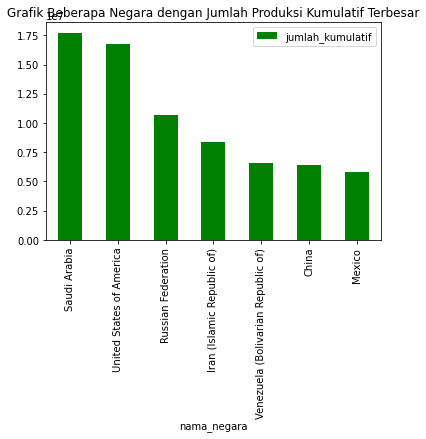

In [1063]:
dataframe_jumlahkumulatifterbesarbaru.plot.bar(x='nama_negara', y='jumlah_kumulatif', color='green', title='Grafik Beberapa Negara dengan Jumlah Produksi Kumulatif Terbesar')

In [1064]:
#nomor d
list_kodenegara = []
list_regionnegara = []
list_subregionnegara = []
for i in range(len(dataframe_kumulatifnegara)) :
    for j in range(len(dataframe_json)) :
        if list(dataframe_kumulatifnegara['nama_negara'])[i] == list(dataframe_json['name'])[j]:
            list_kodenegara.append(list(dataframe_json['alpha-3'])[j])
            list_regionnegara.append(list(dataframe_json['region'])[j])
            list_subregionnegara.append(list(dataframe_json['sub-region'])[j])

In [1065]:
dataframe_kumulatifnegaralengkap = pd.DataFrame(list(zip(list_kodenegara, list_namanegara, list_jumlahkumulatif, list_regionnegara, list_subregionnegara)), columns=['kode_negara', 'nama_negara', 'jumlah_kumulatif', 'region', 'sub-region'])

In [1066]:
T2 = input("Tahun: ")
t2 = int(T2)

In [1067]:
#terbesar
dataframe_jumlahproduksiterbesar2 = dataframe_gabungan.loc[dataframe_gabungan['tahun'] == t2]
dataframe_jumlahproduksiterbesar2 = dataframe_jumlahproduksiterbesar2.sort_values(by='produksi', ascending=False)
dataframe_jumlahproduksibaru2 = dataframe_jumlahproduksiterbesar2[:1]
print(dataframe_jumlahproduksibaru2)

     kode_negara  tahun   produksi               nama_negara    region  \
1305         USA   1971  482149.55  United States of America  Americas   

            sub-region  
1305  Northern America  


In [1068]:
#terbesar keseluruhan tahun
dataframe_terbesarkeseluruhantahun = dataframe_kumulatifnegaralengkap.sort_values(by='jumlah_kumulatif', ascending=False)
dataframe_terbesarkeseluruhantahunbaru = dataframe_terbesarkeseluruhantahun[:1]
print(dataframe_terbesarkeseluruhantahunbaru)

   kode_negara   nama_negara  jumlah_kumulatif region    sub-region
73         SAU  Saudi Arabia      1.771177e+07   Asia  Western Asia


In [1069]:
#terkecil
dataframe_produksitanpanol = dataframe_gabungan[dataframe_gabungan.produksi != 0]
dataframe_jumlahproduksiterkecil = dataframe_produksitanpanol.loc[dataframe_produksitanpanol['tahun'] == t2]
dataframe_jumlahproduksiterkecil = dataframe_jumlahproduksiterkecil.sort_values(by='produksi', ascending=True)
dataframe_jumlahproduksiterkecilbaru = dataframe_jumlahproduksiterkecil[:1]
print(dataframe_jumlahproduksiterkecilbaru)

     kode_negara  tahun  produksi nama_negara region          sub-region
3310         THA   1971    13.234    Thailand   Asia  South-eastern Asia


In [1070]:
#terkecil keseluruhan tahun
dataframe_terkecilkeseluruhantahun = dataframe_terbesarkeseluruhantahun.sort_values(by='jumlah_kumulatif', ascending=True)
dataframe_kumulatiftanpanol = dataframe_terkecilkeseluruhantahun[dataframe_terkecilkeseluruhantahun.jumlah_kumulatif != 0]
dataframe_terkecilkeseluruhantahunbaru = dataframe_kumulatiftanpanol[:1]
print(dataframe_terkecilkeseluruhantahunbaru)

    kode_negara nama_negara  jumlah_kumulatif  region          sub-region
125         SEN     Senegal            17.306  Africa  Sub-Saharan Africa


In [1071]:
#nol
dataframe_produksinol = dataframe_gabungan[dataframe_gabungan.produksi == 0]
dataframe_jumlahproduksinol = dataframe_produksinol.loc[dataframe_produksinol['tahun'] == t2]
print(dataframe_jumlahproduksinol)

     kode_negara  tahun  produksi                              nama_negara  \
90           BEL   1971       0.0                                  Belgium   
225          DNK   1971       0.0                                  Denmark   
270          FIN   1971       0.0                                  Finland   
405          GRC   1971       0.0                                   Greece   
495          ISL   1971       0.0                                  Iceland   
540          IRL   1971       0.0                                  Ireland   
675          KOR   1971       0.0                       Korea, Republic of   
720          LUX   1971       0.0                               Luxembourg   
855          NZL   1971       0.0                              New Zealand   
990          PRT   1971       0.0                                 Portugal   
1125         SWE   1971       0.0                                   Sweden   
1170         CHE   1971       0.0                              S

In [1072]:
#nol keseluruhan tahun
dataframe_kumulatifnol = dataframe_terkecilkeseluruhantahun[dataframe_terkecilkeseluruhantahun.jumlah_kumulatif == 0]
print(dataframe_kumulatifnol)

    kode_negara                              nama_negara  jumlah_kumulatif  \
136         ZWE                                 Zimbabwe               0.0   
16          LUX                               Luxembourg               0.0   
12          IRL                                  Ireland               0.0   
11          ISL                                  Iceland               0.0   
6           FIN                                  Finland               0.0   
2           BEL                                  Belgium               0.0   
102         SLV                              El Salvador               0.0   
103         ERI                                  Eritrea               0.0   
68          PRY                                 Paraguay               0.0   
126         LKA                                Sri Lanka               0.0   
123         PAN                                   Panama               0.0   
113         LBN                                  Lebanon        